#Customer Satisfaction Prediction
Mustafiz Ahmed UMID05072548678

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/UM_Customer_Satisfaction_Prediction/customer_support_tickets.csv')

print("Dataset Overview:")
print(data.head())
print(f"\nShape: {data.shape[0]} rows, {data.shape[1]} columns")

Dataset Overview:
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Per

In [4]:
# Check data info and missing values
data.info()
print("\nMissing Values:")
print(data.isnull().sum()[data.isnull().sum() > 0])

print("\nSummary Statistics:")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

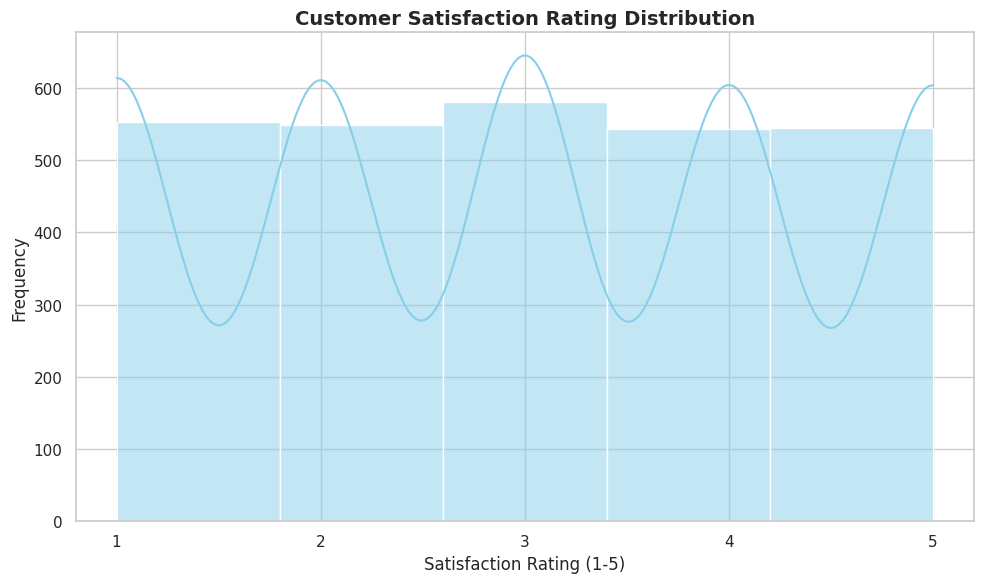

In [5]:
# Distribution of satisfaction ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Satisfaction Rating'].dropna(), bins=5, kde=True, color='skyblue')
plt.title('Customer Satisfaction Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Satisfaction Rating (1-5)')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

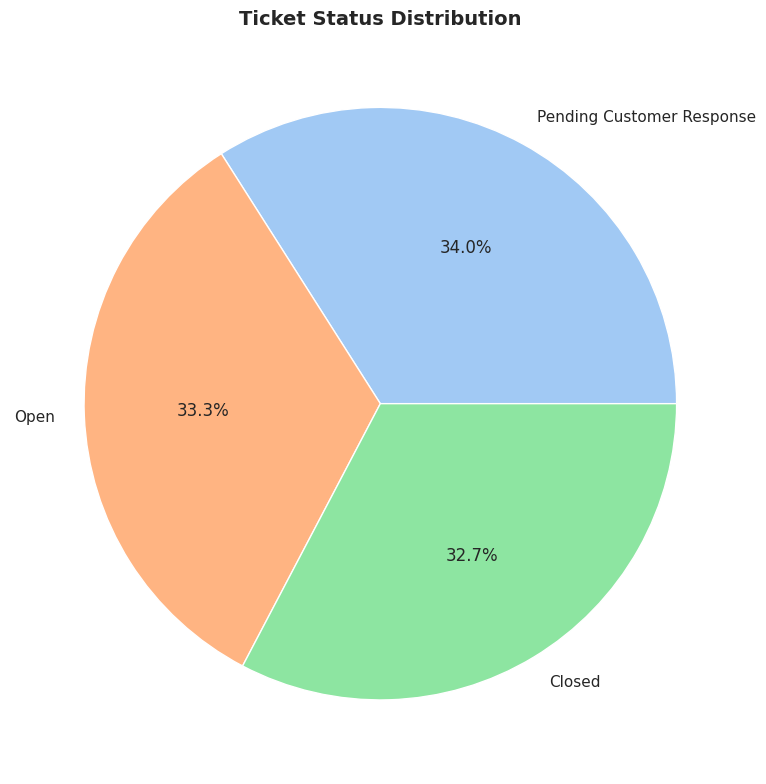

In [6]:
# Ticket status distribution
plt.figure(figsize=(10, 8))
data['Ticket Status'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                          colors=sns.color_palette('pastel'))
plt.title('Ticket Status Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

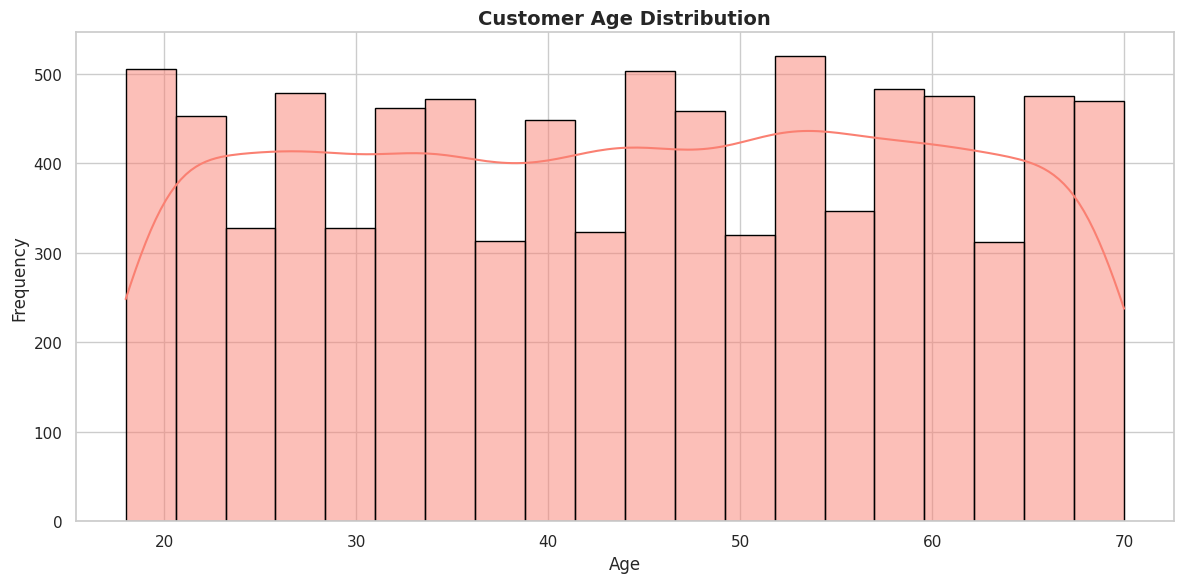

In [7]:
# Customer age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True, color='salmon', edgecolor='black')
plt.title('Customer Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

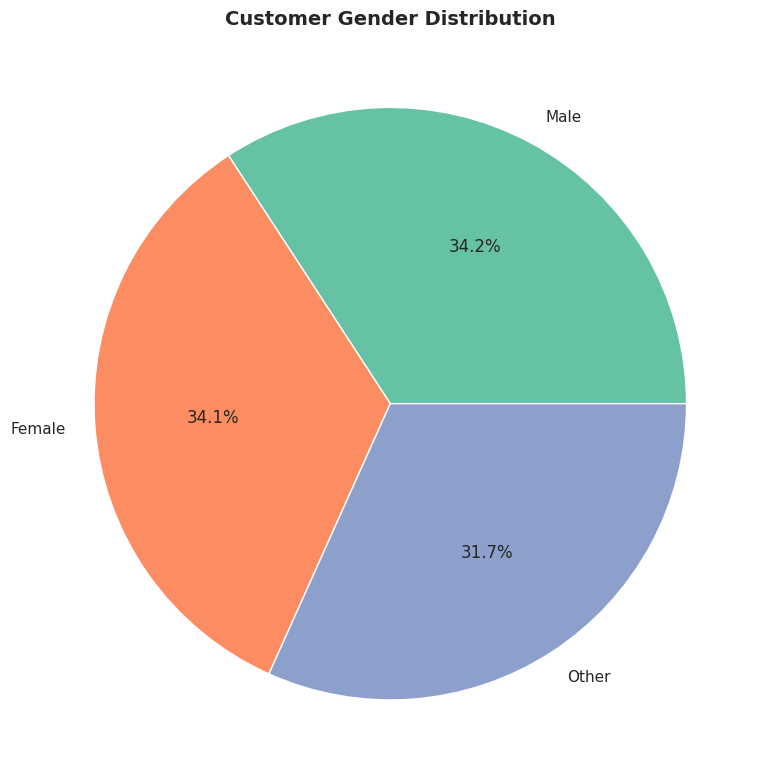

In [8]:
# Gender distribution
plt.figure(figsize=(10, 8))
data['Customer Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                           colors=sns.color_palette('Set2'))
plt.title('Customer Gender Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

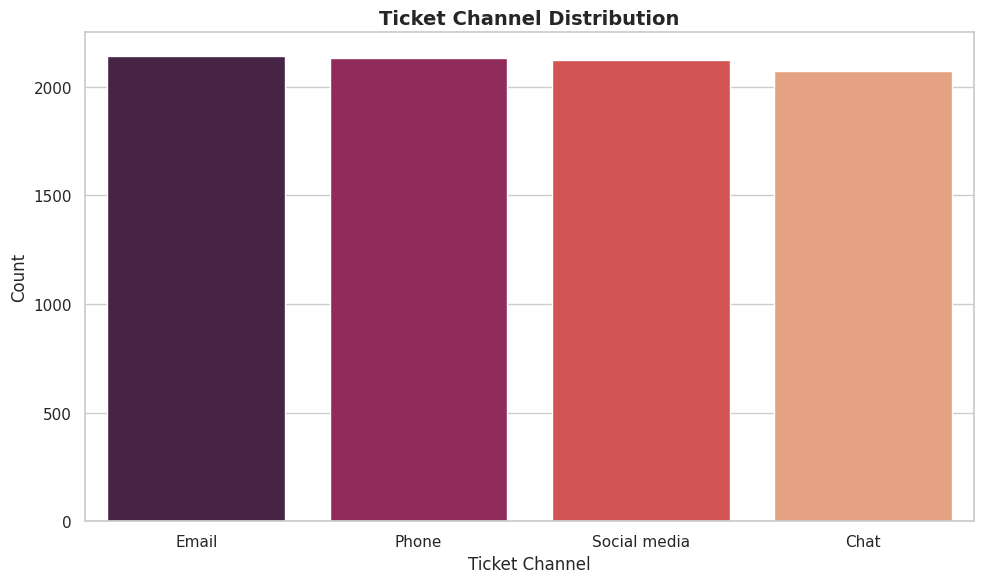

In [9]:
# Ticket channel distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Ticket Channel'].value_counts().index,
            y=data['Ticket Channel'].value_counts().values,
            palette='rocket')
plt.title('Ticket Channel Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

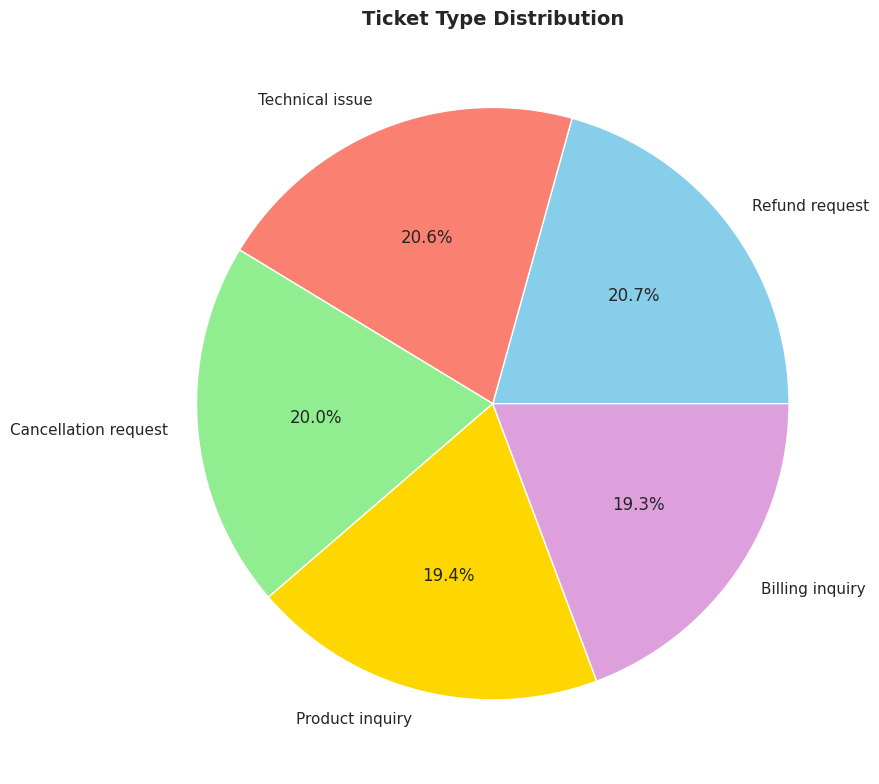

In [10]:
# Ticket type distribution
plt.figure(figsize=(10, 8))
data['Ticket Type'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                        colors=['skyblue', 'salmon', 'lightgreen', 'gold', 'plum'])
plt.title('Ticket Type Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

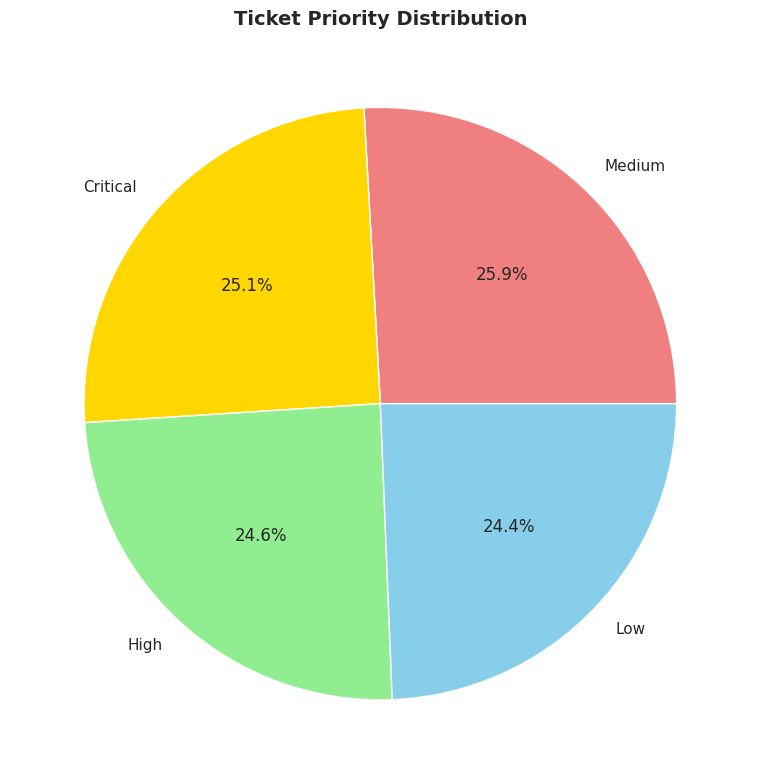

In [11]:
# Priority distribution
plt.figure(figsize=(10, 8))
data['Ticket Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                            colors=['lightcoral', 'gold', 'lightgreen', 'skyblue'])
plt.title('Ticket Priority Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

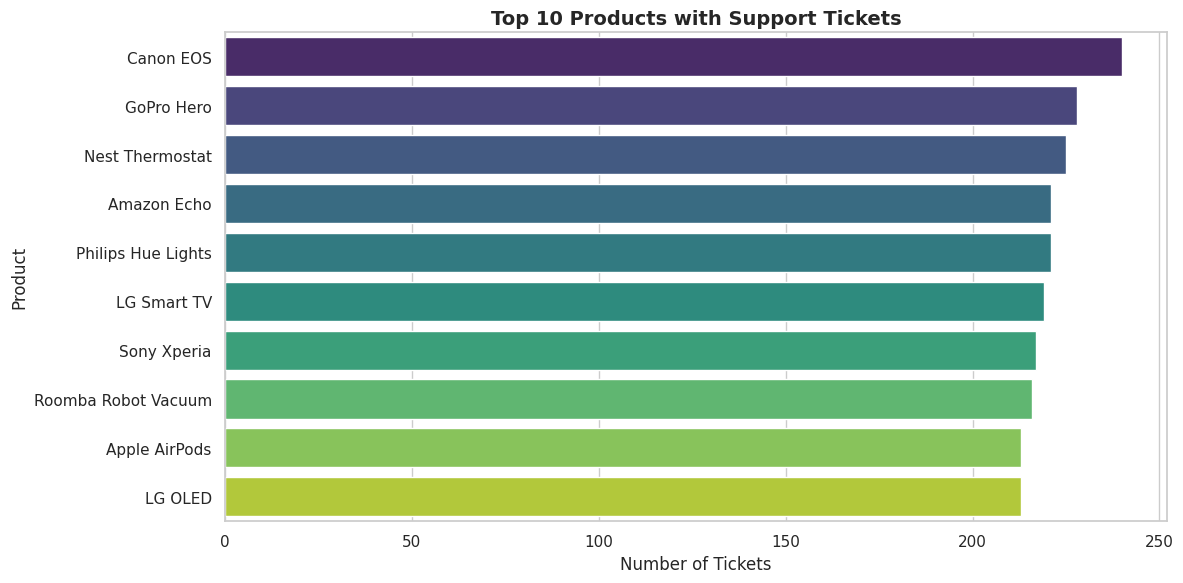

In [12]:
# Top 10 products with support tickets
plt.figure(figsize=(12, 6))
top_products = data['Product Purchased'].value_counts().head(10)
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')
plt.title('Top 10 Products with Support Tickets', fontsize=14, fontweight='bold')
plt.xlabel('Number of Tickets')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

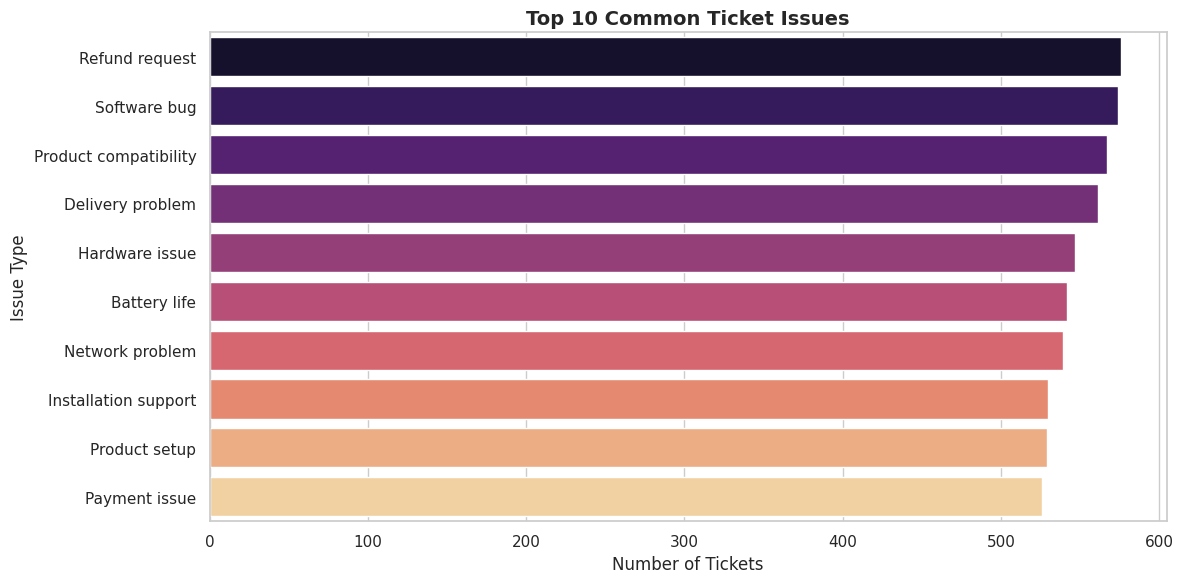

In [13]:
# Top 10 common ticket issues
plt.figure(figsize=(12, 6))
top_issues = data['Ticket Subject'].value_counts().head(10)
sns.barplot(y=top_issues.index, x=top_issues.values, palette='magma')
plt.title('Top 10 Common Ticket Issues', fontsize=14, fontweight='bold')
plt.xlabel('Number of Tickets')
plt.ylabel('Issue Type')
plt.tight_layout()
plt.show()

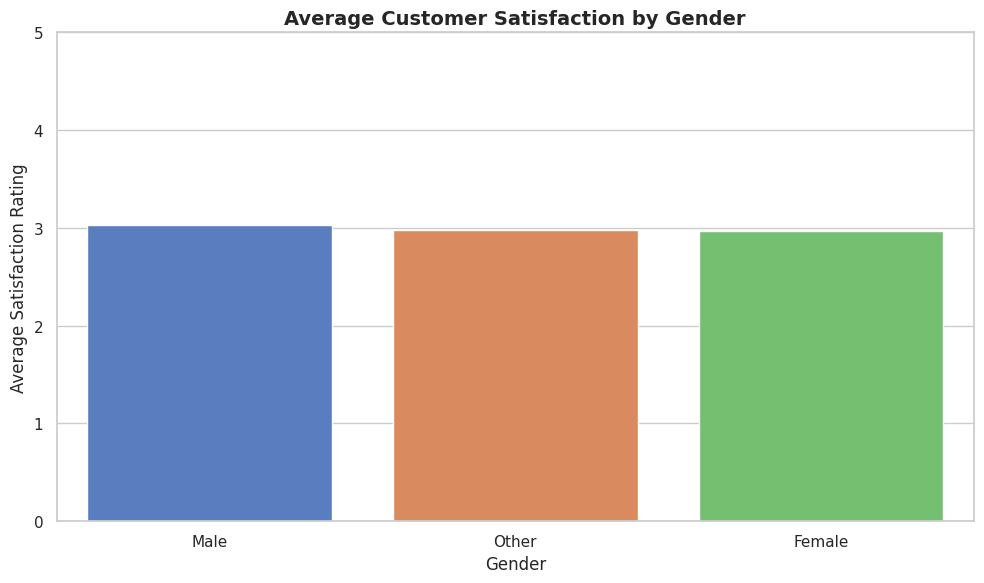

In [14]:
# Average satisfaction by gender
data_with_rating = data[data['Customer Satisfaction Rating'].notna()]
avg_satisfaction = data_with_rating.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_satisfaction.index, y=avg_satisfaction.values, palette='muted')
plt.title('Average Customer Satisfaction by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

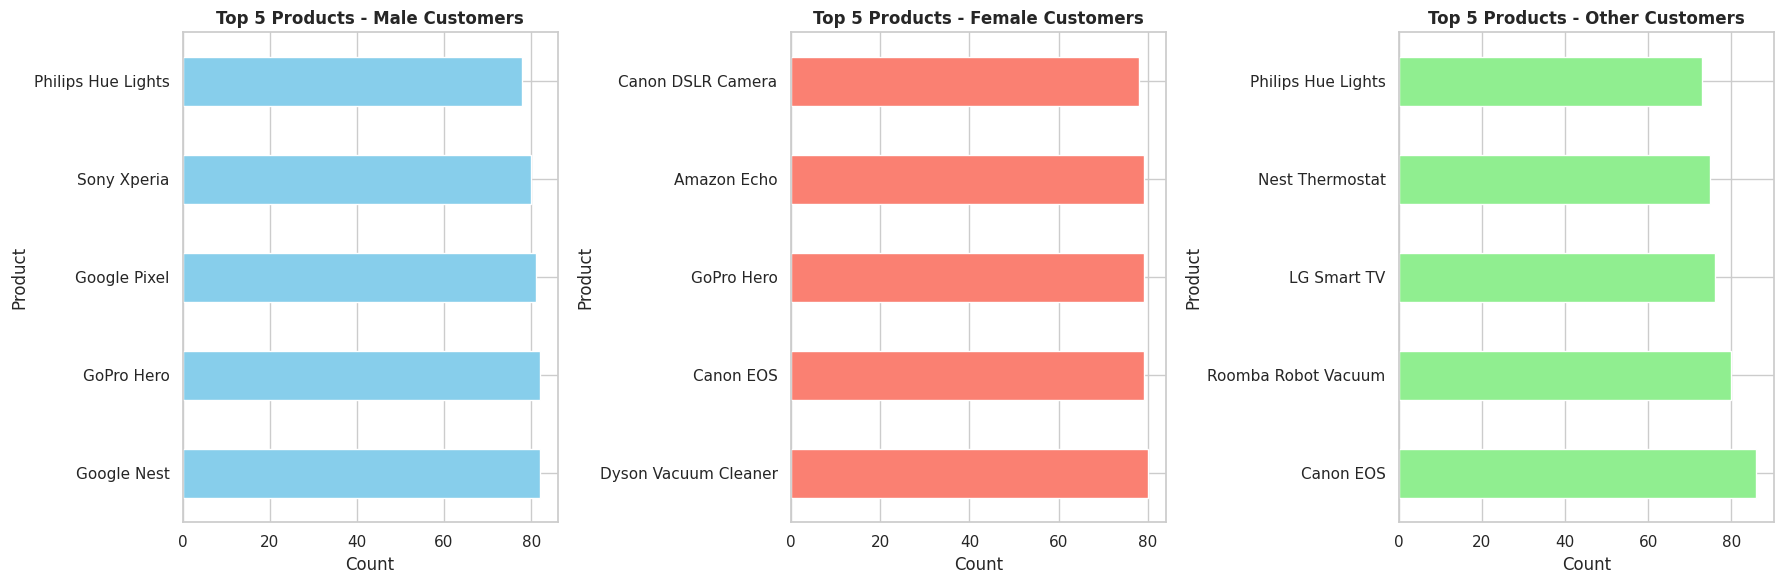

In [15]:
# Gender-wise product preferences
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (gender, ax) in enumerate(zip(['Male', 'Female', 'Other'], axes)):
    top_items = data[data['Customer Gender'] == gender]['Product Purchased'].value_counts().head(5)
    top_items.plot(kind='barh', ax=ax, color=['skyblue', 'salmon', 'lightgreen'][idx])
    ax.set_title(f'Top 5 Products - {gender} Customers', fontsize=12, fontweight='bold')
    ax.set_xlabel('Count')
    ax.set_ylabel('Product')

plt.tight_layout()
plt.show()

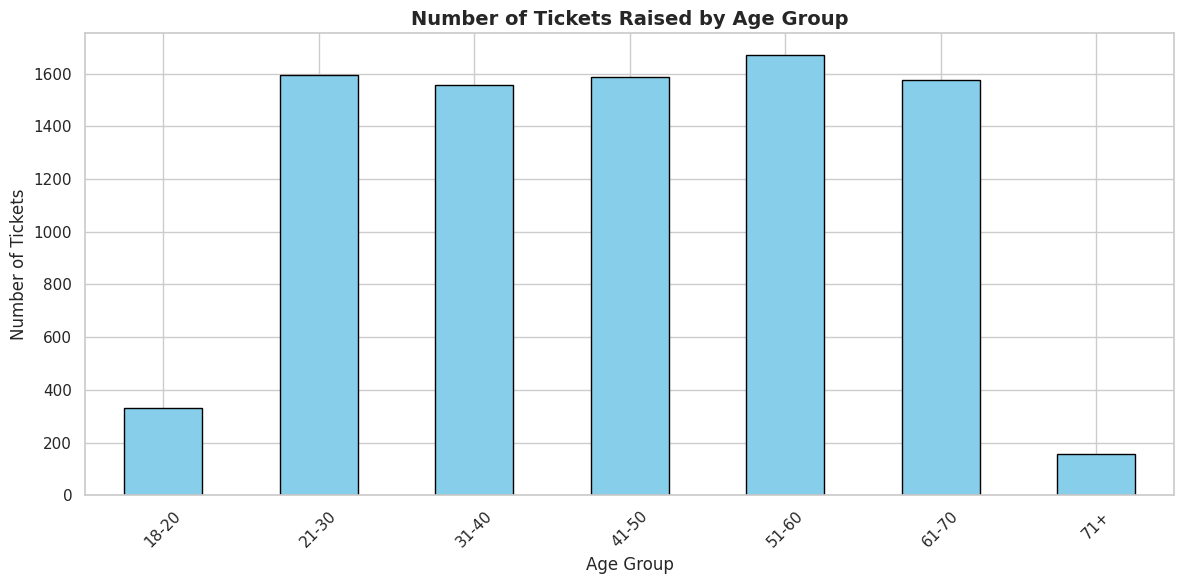

In [16]:
# Tickets by age group
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['18-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
data.groupby('Age Group', observed=True).size().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Tickets Raised by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

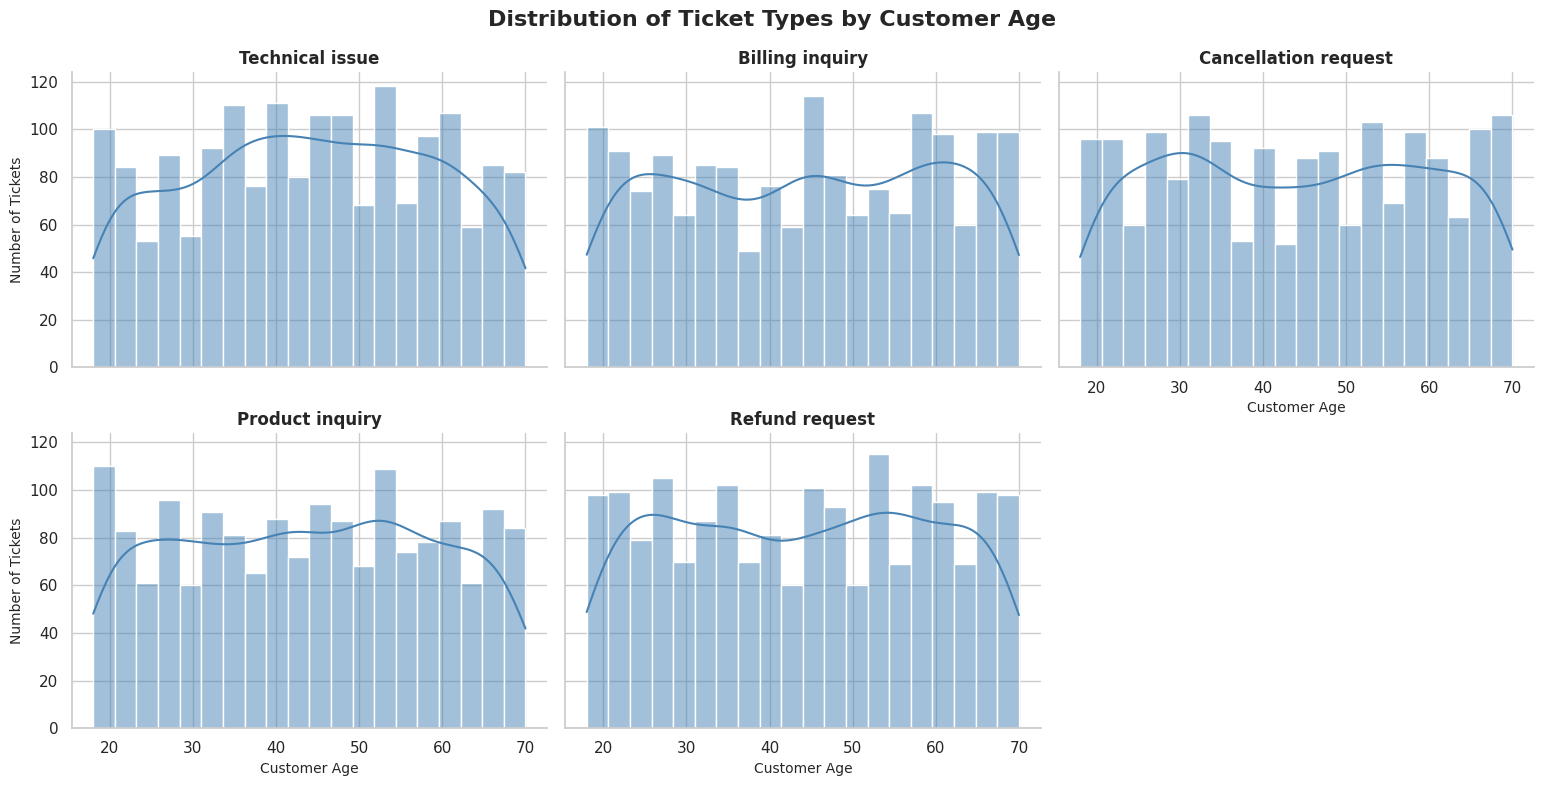

In [17]:
# Ticket types by customer age
data.replace([np.inf, -np.inf], np.nan, inplace=True)
g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3, height=4, aspect=1.3)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True, color='steelblue')
g.set_titles('{col_name}', fontsize=12, fontweight='bold')
g.set_axis_labels('Customer Age', 'Number of Tickets', fontsize=10)
g.fig.suptitle('Distribution of Ticket Types by Customer Age', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [18]:
# Prepare data for machine learning - only closed tickets with ratings
data_ml = data[data['Customer Satisfaction Rating'].notna()].copy()
print(f"\nFiltered dataset: {len(data_ml)} records with satisfaction ratings")


Filtered dataset: 2769 records with satisfaction ratings


In [19]:
# Select features
columns_to_drop = ['Ticket ID', 'Customer Name', 'Customer Email',
                   'Ticket Description', 'Resolution', 'Date of Purchase',
                   'First Response Time', 'Time to Resolution', 'Ticket Status',
                   'Age Group']

X = data_ml.drop(columns_to_drop + ['Customer Satisfaction Rating'], axis=1)
y = data_ml['Customer Satisfaction Rating']

print(f"\nFeatures: {list(X.columns)}")
print(f"Target distribution:\n{y.value_counts().sort_index()}")


Features: ['Customer Age', 'Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Priority', 'Ticket Channel']
Target distribution:
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
Name: count, dtype: int64


In [20]:
# Encode categorical variables
X_encoded = X.copy()
label_encoders = {}

for col in X_encoded.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X_encoded[col] = label_encoders[col].fit_transform(X_encoded[col])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")


Training set: 1938 samples
Testing set: 831 samples


In [21]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
print("\nTraining Random Forest...")
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfc.fit(X_train_scaled, y_train)

y_train_pred_rf = rfc.predict(X_train_scaled)
y_test_pred_rf = rfc.predict(X_test_scaled)

print(f"Random Forest - Train Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Random Forest - Test Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rf))


Training Random Forest...
Random Forest - Train Accuracy: 1.0000
Random Forest - Test Accuracy: 0.1974

Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.24      0.22      0.23       166
         2.0       0.16      0.16      0.16       165
         3.0       0.19      0.22      0.20       174
         4.0       0.21      0.20      0.21       163
         5.0       0.19      0.17      0.18       163

    accuracy                           0.20       831
   macro avg       0.20      0.20      0.20       831
weighted avg       0.20      0.20      0.20       831



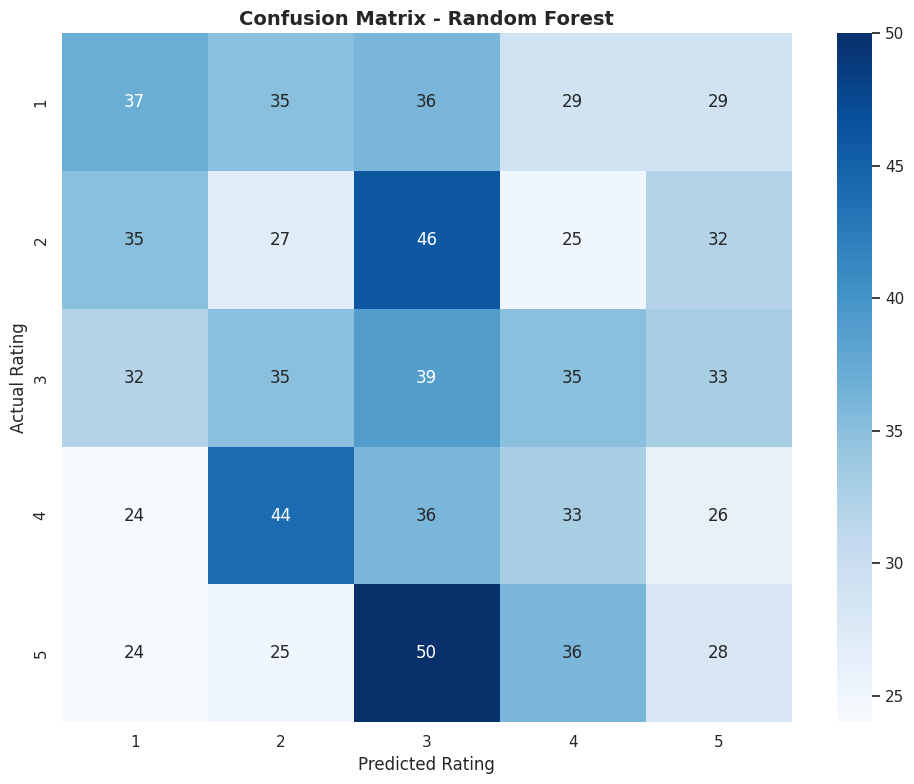

In [22]:
# Confusion matrix
plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Actual Rating')
plt.xlabel('Predicted Rating')
plt.tight_layout()
plt.show()

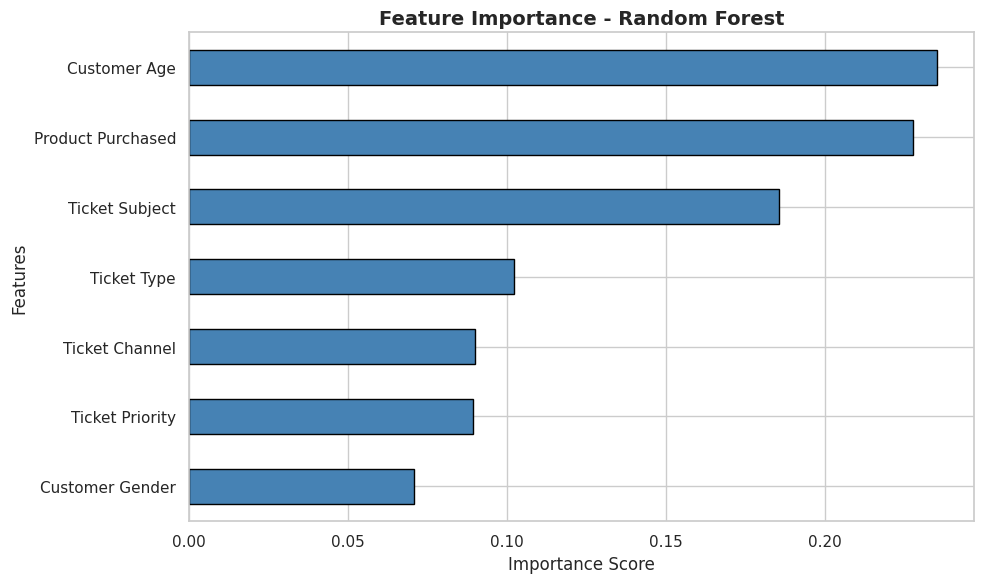


Top 3 Important Features:
1. Customer Age: 0.2350
2. Product Purchased: 0.2276
3. Ticket Subject: 0.1853


In [24]:
# Feature importance
feature_importance = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print("\nTop 3 Important Features:")
for i, (feat, imp) in enumerate(feature_importance.head(3).items(), 1):
    print(f"{i}. {feat}: {imp:.4f}")

In [25]:
# Train Logistic Regression
print("\nTraining Logistic Regression...")
log_reg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
log_reg.fit(X_train_scaled, y_train)

y_train_pred_lr = log_reg.predict(X_train_scaled)
y_test_pred_lr = log_reg.predict(X_test_scaled)

print(f"Logistic Regression - Train Accuracy: {accuracy_score(y_train, y_train_pred_lr):.4f}")
print(f"Logistic Regression - Test Accuracy: {accuracy_score(y_test, y_test_pred_lr):.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_lr))


Training Logistic Regression...
Logistic Regression - Train Accuracy: 0.2425
Logistic Regression - Test Accuracy: 0.1986

Classification Report (Test Set):
              precision    recall  f1-score   support

         1.0       0.20      0.19      0.19       166
         2.0       0.20      0.17      0.18       165
         3.0       0.23      0.33      0.27       174
         4.0       0.17      0.22      0.19       163
         5.0       0.17      0.07      0.10       163

    accuracy                           0.20       831
   macro avg       0.19      0.20      0.19       831
weighted avg       0.19      0.20      0.19       831



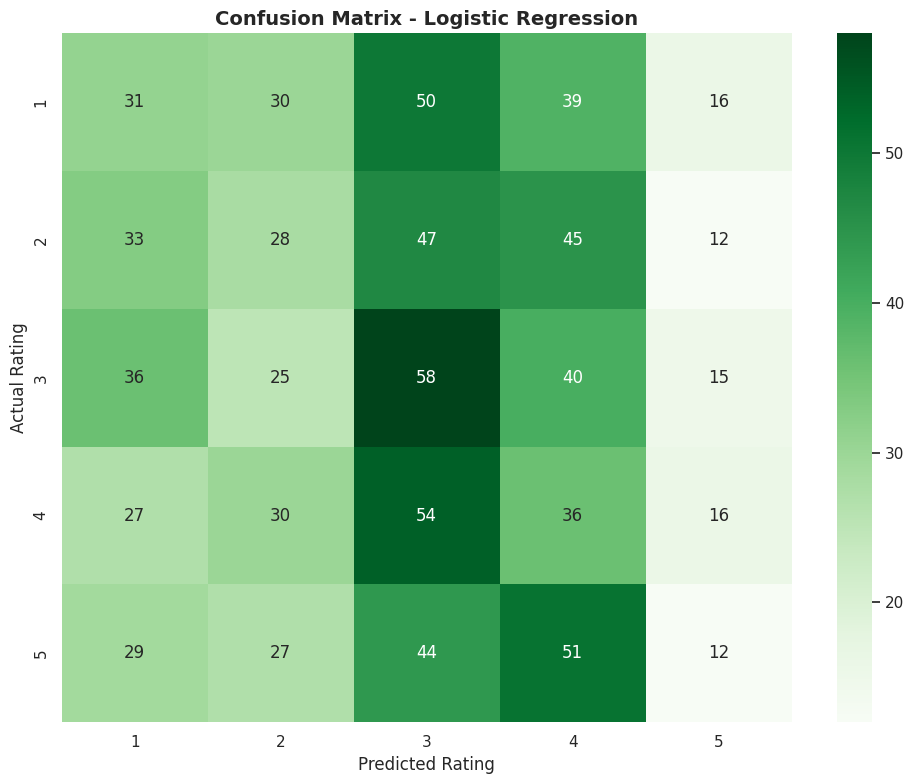

In [26]:
# Confusion matrix
plt.figure(figsize=(10, 8))
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Actual Rating')
plt.xlabel('Predicted Rating')
plt.tight_layout()
plt.show()


Model Comparison:
                 Model  Train Accuracy  Test Accuracy
0        Random Forest        1.000000       0.197353
1  Logistic Regression        0.242518       0.198556


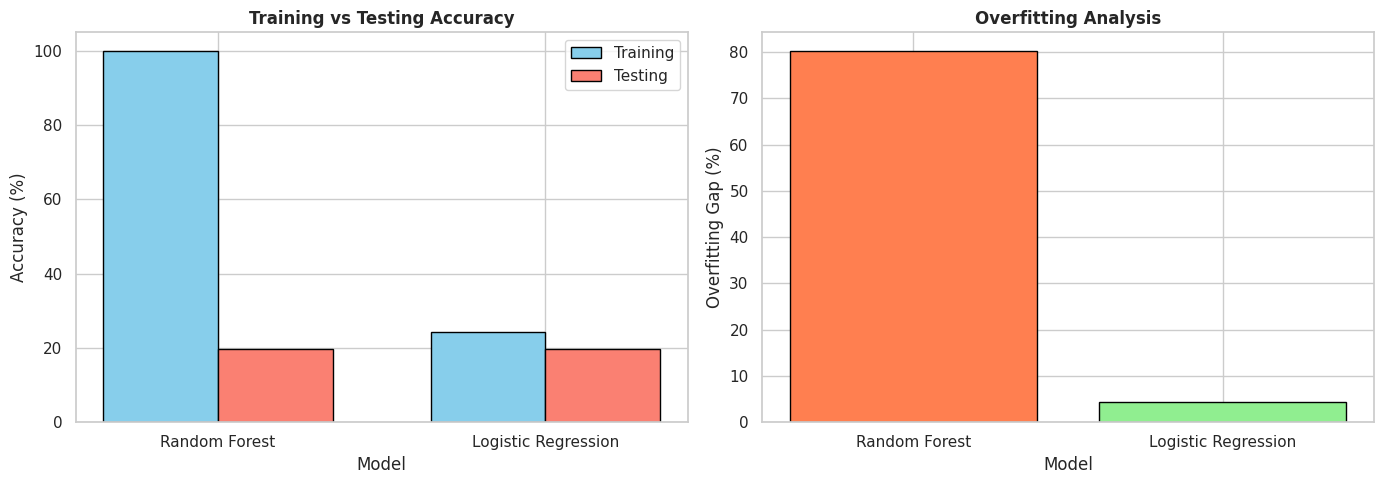

In [28]:
# Model comparison
comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Train Accuracy': [accuracy_score(y_train, y_train_pred_rf),
                       accuracy_score(y_train, y_train_pred_lr)],
    'Test Accuracy': [accuracy_score(y_test, y_test_pred_rf),
                      accuracy_score(y_test, y_test_pred_lr)]
})

print("\nModel Comparison:")
print(comparison)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Accuracy comparison
x = np.arange(len(comparison))
width = 0.35
axes[0].bar(x - width/2, comparison['Train Accuracy'] * 100, width,
            label='Training', color='skyblue', edgecolor='black')
axes[0].bar(x + width/2, comparison['Test Accuracy'] * 100, width,
            label='Testing', color='salmon', edgecolor='black')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Training vs Testing Accuracy', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison['Model'])
axes[0].legend()

# Overfitting gap
overfitting_gap = (comparison['Train Accuracy'] - comparison['Test Accuracy']) * 100
axes[1].bar(comparison['Model'], overfitting_gap, color=['coral', 'lightgreen'], edgecolor='black')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Overfitting Gap (%)')
axes[1].set_title('Overfitting Analysis', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [29]:
# Save models
import pickle

model_path = '/content/drive/MyDrive/UM_Customer_Satisfaction_Prediction/'

with open(model_path + 'random_forest_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)
with open(model_path + 'logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)
with open(model_path + 'scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open(model_path + 'label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print("\nModels saved successfully!")


Models saved successfully!


In [30]:
# Example: Making predictions on new data
print("\nExample Prediction on New Data:")
new_data = pd.DataFrame({
    'Customer Age': [35, 52, 28],
    'Customer Gender': ['Male', 'Female', 'Other'],
    'Product Purchased': ['iPhone', 'Dell XPS', 'Amazon Echo'],
    'Ticket Type': ['Technical issue', 'Billing inquiry', 'Refund request'],
    'Ticket Subject': ['Software bug', 'Payment issue', 'Refund request'],
    'Ticket Priority': ['High', 'Medium', 'Critical'],
    'Ticket Channel': ['Email', 'Phone', 'Chat']
})

print(new_data)


Example Prediction on New Data:
   Customer Age Customer Gender Product Purchased      Ticket Type  \
0            35            Male            iPhone  Technical issue   
1            52          Female          Dell XPS  Billing inquiry   
2            28           Other       Amazon Echo   Refund request   

   Ticket Subject Ticket Priority Ticket Channel  
0    Software bug            High          Email  
1   Payment issue          Medium          Phone  
2  Refund request        Critical           Chat  


In [31]:
# Encode and scale
new_data_encoded = new_data.copy()
for col in label_encoders.keys():
    new_data_encoded[col] = label_encoders[col].transform(new_data_encoded[col])

new_data_scaled = scaler.transform(new_data_encoded)

# Predict
pred_rf = rfc.predict(new_data_scaled)
pred_lr = log_reg.predict(new_data_scaled)

print("\nPredictions:")
print(pd.DataFrame({
    'Ticket': [1, 2, 3],
    'RF Prediction': pred_rf,
    'LR Prediction': pred_lr
}))


Predictions:
   Ticket  RF Prediction  LR Prediction
0       1            3.0            3.0
1       2            1.0            4.0
2       3            4.0            3.0


In [32]:
print("\nProject Summary:")
print(f"• Dataset: {len(data)} total records, {len(data_ml)} with satisfaction ratings")
print(f"• Models trained: Random Forest and Logistic Regression")
print(f"• Test accuracy: ~20% (suggests need for more features)")
print(f"• Key insight: Customer Age and Product type are most important predictors")
print(f"• Recommendation: Add features like sentiment analysis, resolution quality metrics")


Project Summary:
• Dataset: 8469 total records, 2769 with satisfaction ratings
• Models trained: Random Forest and Logistic Regression
• Test accuracy: ~20% (suggests need for more features)
• Key insight: Customer Age and Product type are most important predictors
• Recommendation: Add features like sentiment analysis, resolution quality metrics
